In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'1.3.0'

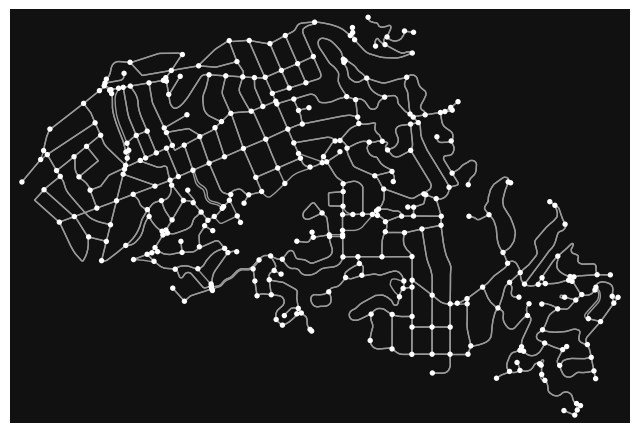

In [9]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

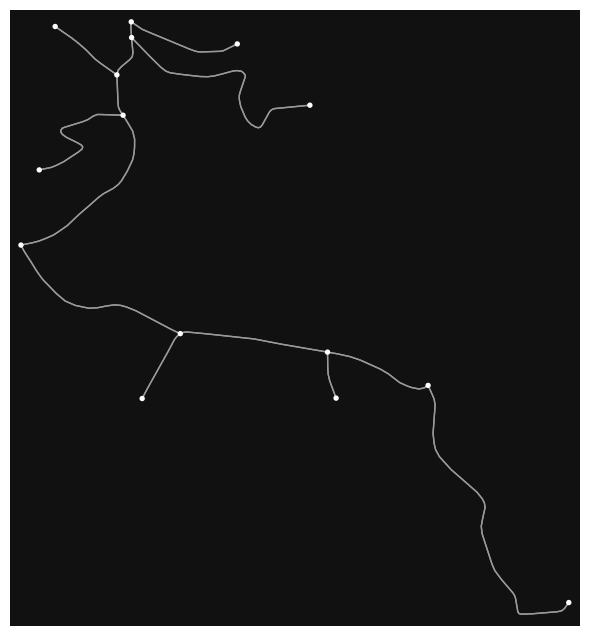

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
G = ox.graph_from_point((-23.54, -46), dist=750, network_type='all')
ox.plot_graph(G)